In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
# sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
import StructureFactor
from scipy import linalg as la
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/data/FS_plots/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathMAC

0 2
temp of the structure factor 2
1 10
temp of the structure factor 10


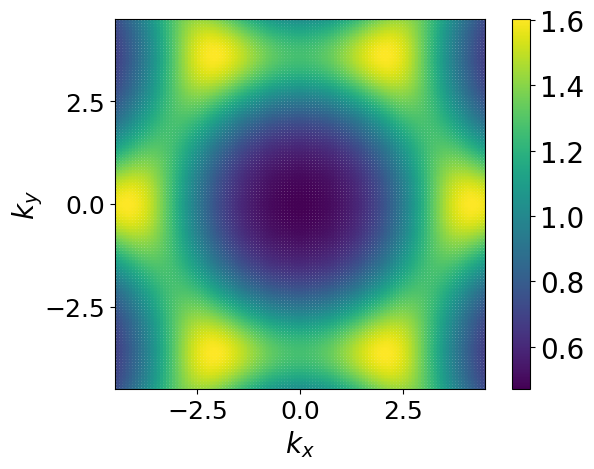

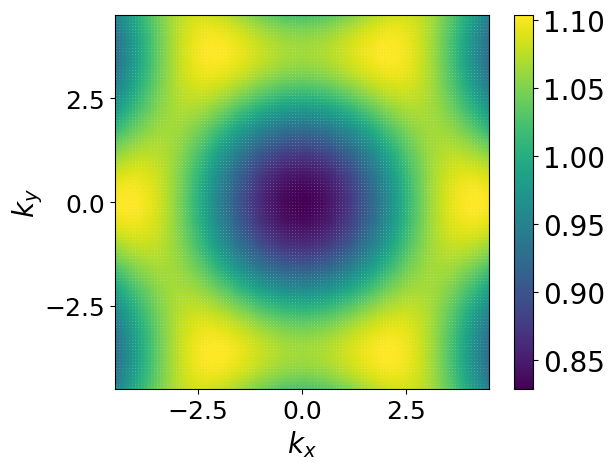

In [3]:
ST=[]

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
TTT=np.array([2,10])
for i,T in enumerate(TTT):
    print(i,T)
    fig,ax=plt.subplots(1,1)
    SS=StructureFactor.StructureFac_fit_F(T)
    im=ax.scatter(x,y,c=SS.Static_SF( x,y),s=4)
    ax.set_xlim([-4.5,4.5])
    ax.set_ylim([-4.5,4.5])
    ax.set_xlabel(r"$k_x$",size=20)
    ax.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=4)
    
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('imgs/static_T'+str(T)+'.png',dpi=400)

temp of the structure factor 1.0
temp of the structure factor 10.0


[Text(0.5, 0, '0.5'), Text(1.0, 0, '1')]

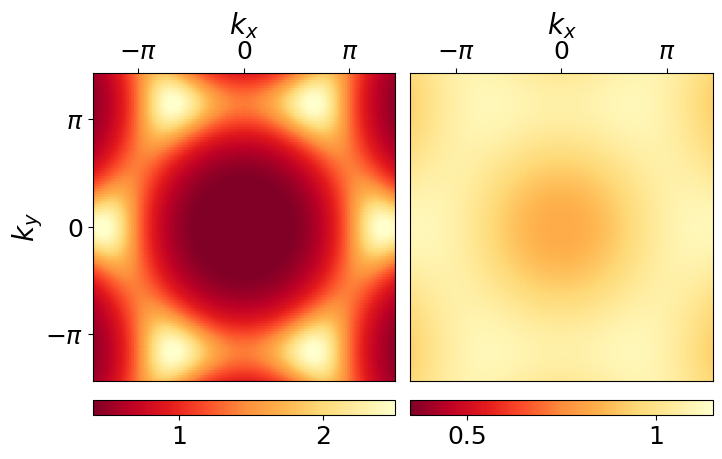

In [4]:
figure = plt.figure(figsize = (8, 5))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=True)

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
T=1.0
ind=0
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.4
vmax=2.5
im=axis[ind].scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis[ind].set_xlim([-4.5,4.5])
axis[ind].set_ylim([-4.5,4.5])
axis[ind].set_xlabel(r"$k_x$",size=20)
axis[ind].set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18)
axis[ind].locator_params(axis='y', nbins=4)
axis[ind].locator_params(axis='x', nbins=4)
axis[ind].xaxis.set_label_position("top")
axis[ind].xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis[ind].set_xticks(xtpos)
axis[ind].set_xticklabels(xt,size=18)
yt=[r"$-\pi$",0,r"$\pi$"]
ytpos=np.array([-np.pi,0,np.pi])
axis[ind].set_yticks(xtpos)
axis[ind].set_yticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.05, ticks=[1,2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['1', '2'])  # vertically oriented colorbar

T=10.0
ind=1
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.35
vmax=1.15
im=axis[ind].scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis[ind].set_xlim([-4.5,4.5])
axis[ind].set_ylim([-4.5,4.5])
axis[ind].set_xlabel(r"$k_x$",size=20)
# axis[ind].set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18,left = False)
axis[ind].locator_params(axis='y', nbins=4)
axis[ind].locator_params(axis='x', nbins=4)
axis[ind].xaxis.set_label_position("top")
axis[ind].xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis[ind].set_xticks(xtpos)
axis[ind].set_xticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.05, ticks=[0.5,1.0])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0.5', '1'])  # vertically oriented colorbar

Machine arg is, FMAC
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


[Text(0, 0, '0'), Text(2, 0, '2'), Text(4, 0, '4'), Text(6, 0, '6')]

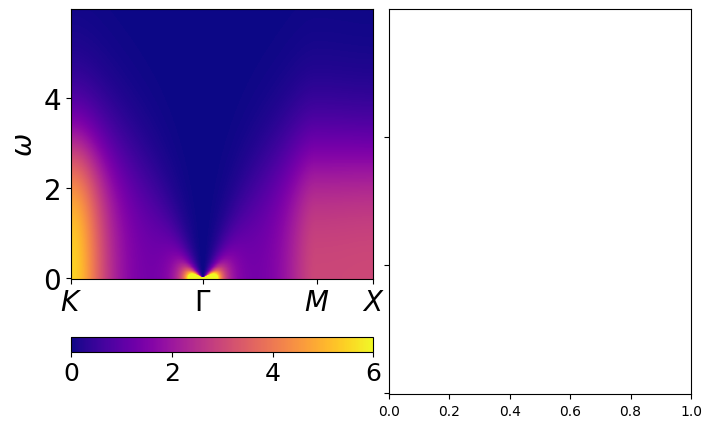

In [5]:
###########
Machine='FMAC'

figure = plt.figure(figsize = (8, 5))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=True)


l=Lattice.TriangLattice(10,False,Machine)
T=1.0
ind=0

SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis[ind].imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis[ind].set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis[ind].set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis[ind].set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar





Machine arg is, FMAC
Machine arg is, FMAC
reading lattice from... ./Lattices/KgridX100.npy
reading lattice from... ./Lattices/KgridY100.npy
Machine arg is, FMAC
temp of the structure factor 1.0


/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular/StructureFactor.py:276: RuntimeWarning: invalid value encountered in divide
  fac=x*NN/(sinhal*sinhal+et_q)


temp of the structure factor 10.0


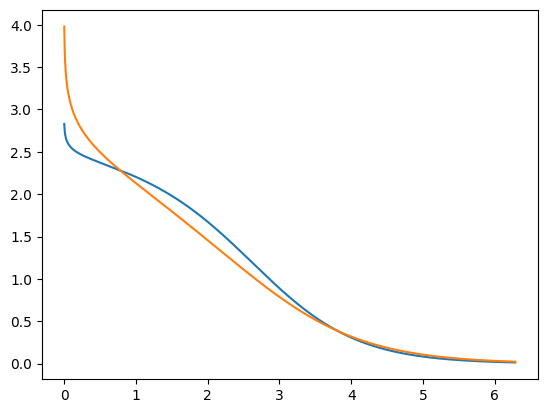

In [6]:
Npoints=1000
Npoints_int_pre, NpointsFS_pre=100,600
save=True

l=Lattice.TriangLattice(Npoints_int_pre, save, Machine)
Npoints_diff=1000
latt_dif=Lattice.TriangLattice(Npoints_diff, save,Machine)
[KX,KY]=l.read_lattice()
# [KX,KY]=l.Generate_lattice_SQ()
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, Machine)
# [KX2,KY2]=l2.Generate_lattice()
Vol_rec2=l2.Vol_BZ()

Npoints_int=np.size(KX)
ds=Vol_rec/Npoints_int


ome=np.linspace(0, 2*np.pi, 2000)
dome=ome[1]-ome[0]

Tvals=[1.0,10.0]
for i,T in enumerate(Tvals):
        SS=StructureFactor.StructureFac_fit_F(T)
        S=[]
        for omega in ome:
            Siav=np.sum(SS.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
            S.append(Siav)
            
        plt.plot(ome,S)

In [7]:
from scipy.interpolate import RegularGridInterpolator # You may have some better interpolation methods
import time
############################################################
# Reading the structure factor
############################################################
L = 120
n_freqs = 4097



# Momentum and frequency ranges (with some built in buffers)


K1 = np.arange(-4*L//3, 4*L//3)
K2 = np.arange(-4*L//3, 4*L//3)

nX,nY=np.meshgrid(K1,K2)
F = np.arange(0, n_freqs)

############################################################
# first
############################################################
Ta='1.0'
T=float(Ta)
print("loading data for the structure factor at T="+Ta)
s=time.time()

dsf_data_1 = np.load('/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/Struc_dat/dsf_TLHAF_L=120_tf=4096_T='+Ta+'.npy')

e=time.time()
print("time for loading", e-s)



def dsf_func_1(k1, k2, w):

    return dsf_data_1[k1%L, k2%L, w]


print("reshaping the original array....")
s=time.time()
#dsf_func_data = np.array([[[dsf_func(k1, k2, w) for k1 in K1] for k2 in K2] for w in F])
dsf_func_data_1 = np.array([ dsf_func_1( nX,nY, w) for w in F])

print(np.shape(dsf_func_data_1 ))
e=time.time()
print("time for recasting", e-s)




############################################################
# Interpolating 
############################################################

s=time.time()
dsf_interp_1 = RegularGridInterpolator((F, K1, K2), dsf_func_data_1, method='linear')
e=time.time()
print("time for interpolation", e-s)


def dsf_1(qx, qy, f):

    k1 = L*qx/(2*np.pi)
    k2 = L*(qx/2 + np.sqrt(3)*qy/2)/(2*np.pi)
    w = n_freqs*f/(2*np.pi)

    return dsf_interp_1((w, k2, k1)) # this has to be called in the reverse order for some reason.


############################################################
# second
############################################################

Ta='3.0'
T=float(Ta)
print("loading data for the structure factor at T="+Ta)
s=time.time()

dsf_data_3 = np.load('/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/Struc_dat/dsf_TLHAF_L=120_tf=4096_T='+Ta+'.npy')

e=time.time()
print("time for loading", e-s)



def dsf_func_3(k1, k2, w):

    return dsf_data_3[k1%L, k2%L, w]


print("reshaping the original array....")
s=time.time()
#dsf_func_data = np.array([[[dsf_func(k1, k2, w) for k1 in K1] for k2 in K2] for w in F])
dsf_func_data_3 = np.array([ dsf_func_3( nX,nY, w) for w in F])

print(np.shape(dsf_func_data_3 ))
e=time.time()
print("time for recasting", e-s)




############################################################
# Interpolating 
############################################################

s=time.time()
dsf_interp_3 = RegularGridInterpolator((F, K1, K2), dsf_func_data_3, method='linear')
e=time.time()
print("time for interpolation", e-s)


def dsf_3(qx, qy, f):

    k1 = L*qx/(2*np.pi)
    k2 = L*(qx/2 + np.sqrt(3)*qy/2)/(2*np.pi)
    w = n_freqs*f/(2*np.pi)

    return dsf_interp_3((w, k2, k1)) # this has to be called in the reverse order for some reason.


############################################################
# third
############################################################
Ta='10.0'
T=float(Ta)
print("loading data for the structure factor at T="+Ta)
s=time.time()

dsf_data_10 = np.load('/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/Struc_dat/dsf_TLHAF_L=120_tf=4096_T='+Ta+'.npy')

e=time.time()
print("time for loading", e-s)



def dsf_func_10(k1, k2, w):

    return dsf_data_10[k1%L, k2%L, w]


print("reshaping the original array....")
s=time.time()
#dsf_func_data = np.array([[[dsf_func(k1, k2, w) for k1 in K1] for k2 in K2] for w in F])
dsf_func_data_10 = np.array([ dsf_func_10( nX,nY, w) for w in F])

print(np.shape(dsf_func_data_10 ))
e=time.time()
print("time for recasting", e-s)




############################################################
# Interpolating 
############################################################

s=time.time()
dsf_interp_10 = RegularGridInterpolator((F, K1, K2), dsf_func_data_10, method='linear')
e=time.time()
print("time for interpolation", e-s)


def dsf_10(qx, qy, f):

    k1 = L*qx/(2*np.pi)
    k2 = L*(qx/2 + np.sqrt(3)*qy/2)/(2*np.pi)
    w = n_freqs*f/(2*np.pi)

    return dsf_interp_10((w, k2, k1)) # this has to be called in the reverse order for some reason.



loading data for the structure factor at T=1.0
time for loading 0.08337998390197754
reshaping the original array....
(4097, 320, 320)
time for recasting 3.8921308517456055
time for interpolation 0.00012874603271484375
loading data for the structure factor at T=3.0
time for loading 0.08189702033996582
reshaping the original array....
(4097, 320, 320)
time for recasting 3.769315004348755
time for interpolation 0.0001220703125
loading data for the structure factor at T=10.0
time for loading 0.08519911766052246
reshaping the original array....
(4097, 320, 320)
time for recasting 3.896566152572632
time for interpolation 0.00012111663818359375


Machine arg is, FMAC
Machine arg is, FMAC
reading lattice from... ./Lattices/KgridX100.npy
reading lattice from... ./Lattices/KgridY100.npy
Machine arg is, FMAC
temp of the structure factor 1.0
temp of the structure factor 3.0
temp of the structure factor 10.0


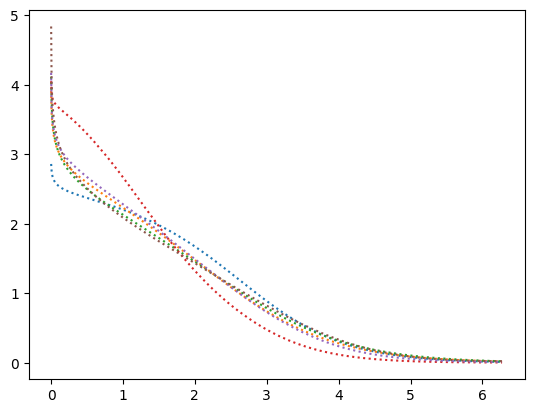

In [8]:
Npoints=1000
Npoints_int_pre, NpointsFS_pre=100,600
save=True

l=Lattice.TriangLattice(Npoints_int_pre, save, Machine)
Npoints_diff=1000
latt_dif=Lattice.TriangLattice(Npoints_diff, save,Machine)
[KX,KY]=l.read_lattice()
# [KX,KY]=l.Generate_lattice_SQ()
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, Machine)
# [KX2,KY2]=l2.Generate_lattice()
Vol_rec2=l2.Vol_BZ()

Npoints_int=np.size(KX)
ds=Vol_rec/Npoints_int


ome=np.linspace(0.001, 2*np.pi-0.01, 1000)
dome=ome[1]-ome[0]


S1_fit=[]
S3_fit=[]
S10_fit=[]

SS1=StructureFactor.StructureFac_fit_F(1.0)
SS3=StructureFactor.StructureFac_fit_F(3.0)
SS10=StructureFactor.StructureFac_fit_F(10.0)
for omega in ome:
    Siav=np.sum(SS1.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
    S1_fit.append(Siav)
    Siav=np.sum(SS3.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
    S3_fit.append(Siav)
    Siav=np.sum(SS10.Dynamical_SF(KX,KY,np.abs(omega)))*ds/Vol_rec
    S10_fit.append(Siav)
        
        
    
plt.plot(ome,S1_fit, ls=':')
plt.plot(ome,S3_fit, ls=':')
plt.plot(ome,S10_fit, ls=':')
        
S1=[]
S3=[]
S10=[]
for omega in ome:
    Siav=np.sum(dsf_1(KX,KY,np.abs(omega)))*ds/Vol_rec
    S1.append(Siav)
    Siav=np.sum(dsf_3(KX,KY,np.abs(omega)))*ds/Vol_rec
    S3.append(Siav)
    Siav=np.sum(dsf_10(KX,KY,np.abs(omega)))*ds/Vol_rec
    S10.append(Siav)
    
    
plt.plot(ome,S1, ls=':')
plt.plot(ome,S3, ls=':')
plt.plot(ome,S10, ls=':')

Machine arg is, FMAC
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


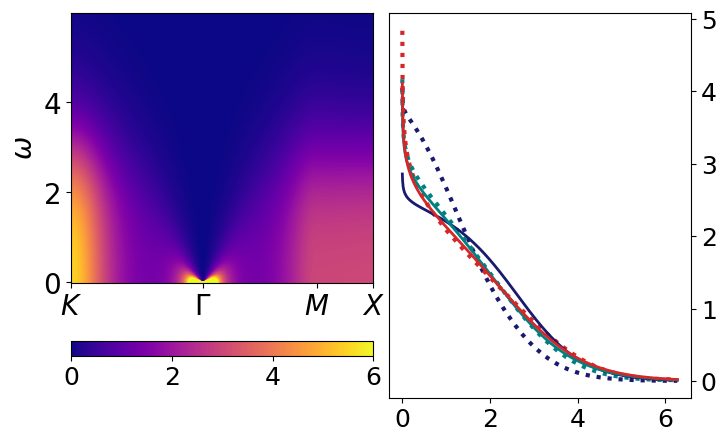

In [9]:
###########
Machine='FMAC'

figure = plt.figure(figsize = (8, 5))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=False)


l=Lattice.TriangLattice(10,False,Machine)
T=1.0
ind=0

SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis[ind].imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis[ind].set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis[ind].set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis[ind].set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar


ind=1

lwval=3
axis[ind].plot(ome,S1, ls=':', c='midnightblue', lw=lwval)
axis[ind].plot(ome,S3, ls=':', c='teal', lw=lwval)
axis[ind].plot(ome,S10, ls=':', c='tab:red', lw=lwval)

    
lwval=2
axis[ind].plot(ome,S1_fit, ls='-', c='midnightblue', lw=lwval)
axis[ind].plot(ome,S3_fit, ls='-', c='teal', lw=lwval)
axis[ind].plot(ome,S10_fit, ls='-', c='tab:red', lw=lwval)

axis[ind].yaxis.set_label_position("right")
axis[ind].yaxis.tick_right()
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18,left = False)

Machine arg is, FMAC
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


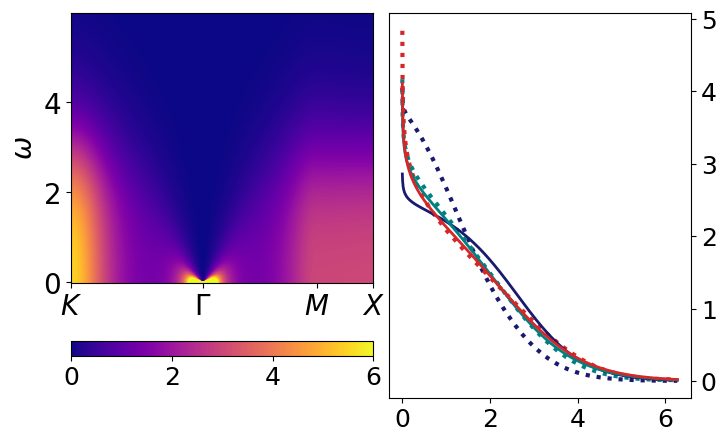

In [10]:
###########
Machine='FMAC'

figure = plt.figure(figsize = (8, 5))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=False)


l=Lattice.TriangLattice(10,False,Machine)
T=1.0
ind=0

SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis[ind].imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis[ind].set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis[ind].set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis[ind].set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar


ind=1

lwval=3
axis[ind]=axis[ind]
axis[ind].plot(ome,S1, ls=':', c='midnightblue', lw=lwval)
axis[ind].plot(ome,S3, ls=':', c='teal', lw=lwval)
axis[ind].plot(ome,S10, ls=':', c='tab:red', lw=lwval)

    
lwval=2
axis[ind].plot(ome,S1_fit, ls='-', c='midnightblue', lw=lwval)
axis[ind].plot(ome,S3_fit, ls='-', c='teal', lw=lwval)
axis[ind].plot(ome,S10_fit, ls='-', c='tab:red', lw=lwval)

axis[ind].yaxis.set_label_position("right")
axis[ind].yaxis.tick_right()
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18,left = False)

temp of the structure factor 1.0
temp of the structure factor 10.0
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


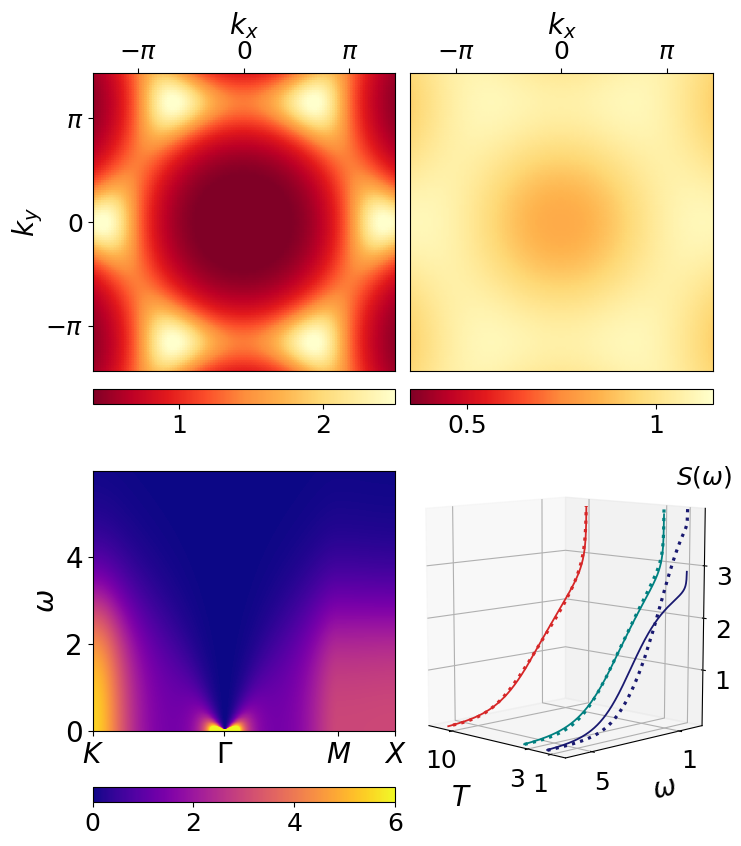

In [13]:
figure = plt.figure(figsize = (8, 10))
gs = figure.add_gridspec(2,2, wspace=.05, hspace=.07)
axis1 = figure.add_subplot(gs[0,0])
axis2 = figure.add_subplot(gs[0,1], sharey=axis1)
plt.setp(axis2.get_yticklabels(), visible=False)
axis3 = figure.add_subplot(gs[1,0])
axis4 = figure.add_subplot(gs[1,1], projection='3d')
#####################################


x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
T=1.0
ind=0
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.4
vmax=2.5
im=axis1.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis1.set_xlim([-4.5,4.5])
axis1.set_ylim([-4.5,4.5])
axis1.set_xlabel(r"$k_x$",size=20)
axis1.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis1.tick_params(axis='x', which='major', labelsize=18)
axis1.tick_params(axis='y', which='major', labelsize=18)
axis1.locator_params(axis='y', nbins=4)
axis1.locator_params(axis='x', nbins=4)
axis1.xaxis.set_label_position("top")
axis1.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis1.set_xticks(xtpos)
axis1.set_xticklabels(xt,size=18)
yt=[r"$-\pi$",0,r"$\pi$"]
ytpos=np.array([-np.pi,0,np.pi])
axis1.set_yticks(xtpos)
axis1.set_yticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis1, location='bottom',orientation="horizontal", pad = 0.05, ticks=[1,2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['1', '2'])  # vertically oriented colorbar

T=10.0
ind=1
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.35
vmax=1.15
im=axis2.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis2.set_xlim([-4.5,4.5])
axis2.set_ylim([-4.5,4.5])
axis2.set_xlabel(r"$k_x$",size=20)
# axis2.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis2.tick_params(axis='x', which='major', labelsize=18)
axis2.tick_params(axis='y', which='major', labelsize=18,left = False)
axis2.locator_params(axis='y', nbins=4)
axis2.locator_params(axis='x', nbins=4)
axis2.xaxis.set_label_position("top")
axis2.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis2.set_xticks(xtpos)
axis2.set_xticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis2, location='bottom',orientation="horizontal", pad = 0.05, ticks=[0.5,1.0])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0.5', '1'])  # vertically oriented colorbar
#####################################
T=1.0
SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis3.imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis3.set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis3.set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis3.set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis3, location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar

######################################
ome=np.linspace(0.001, 2*np.pi-0.01, 1000)
ome2=np.array(ome)
lwval=1.3
axis4.plot3D(0*ome2+1,ome2,S1_fit, ls='-', c='midnightblue', lw=lwval)
axis4.plot3D(0*ome2+3,ome2,S3_fit, ls='-', c='teal', lw=lwval)
axis4.plot3D(0*ome2+10,ome2,S10_fit, ls='-', c='tab:red', lw=lwval)
lwval=2.3
axis4.plot(0*ome2+ 1,ome2,S1, ls=':', c='midnightblue', lw=lwval)
axis4.plot(0*ome2+3,ome2,S3, ls=':', c='teal', lw=lwval)
axis4.plot(0*ome2+10,ome2,S10, ls=':', c='tab:red', lw=lwval)

axis4.tick_params(axis='x', which='major', labelsize=18, pad=0)
axis4.tick_params(axis='y', which='major', labelsize=18,left = False, pad=0)
axis4.tick_params(axis='z', which='major', labelsize=18, pad=0)

axis4.set_xlabel(r"$T$",size=20)
axis4.set_ylabel(r"$\omega$",size=20,labelpad=.0001)
# axis4.set_zlabel(r"$S(\omega)$",size=20,labelpad=.0001)


xt=[r"1",r"3",r"10"]
xtpos=np.array([1,3,10])
axis4.set_xticks(xtpos, pad=0.001)
axis4.set_xlim([0,12])
yt=[r"1",r"5"]
ytpos=np.array([1,5])
axis4.set_yticks(ytpos, pad=0.001)
axis4.set_ylim([0,6])
zt=[r"1",r"2",r"3"]
ztpos=np.array([1,2,3])
axis4.set_zticks(ztpos, pad=0.001)
axis4.set_zlim([0,4])


from mpl_toolkits.mplot3d import Axes3D
axis4.get_proj = lambda: np.dot(Axes3D.get_proj(axis4), np.diag([1, 1, 1.5, 1]))
axis4.text(2, 0, 4.5, r"$S(\omega)$", fontsize=18)
axis4.view_init(10, 135)

temp of the structure factor 1.0
temp of the structure factor 10.0
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


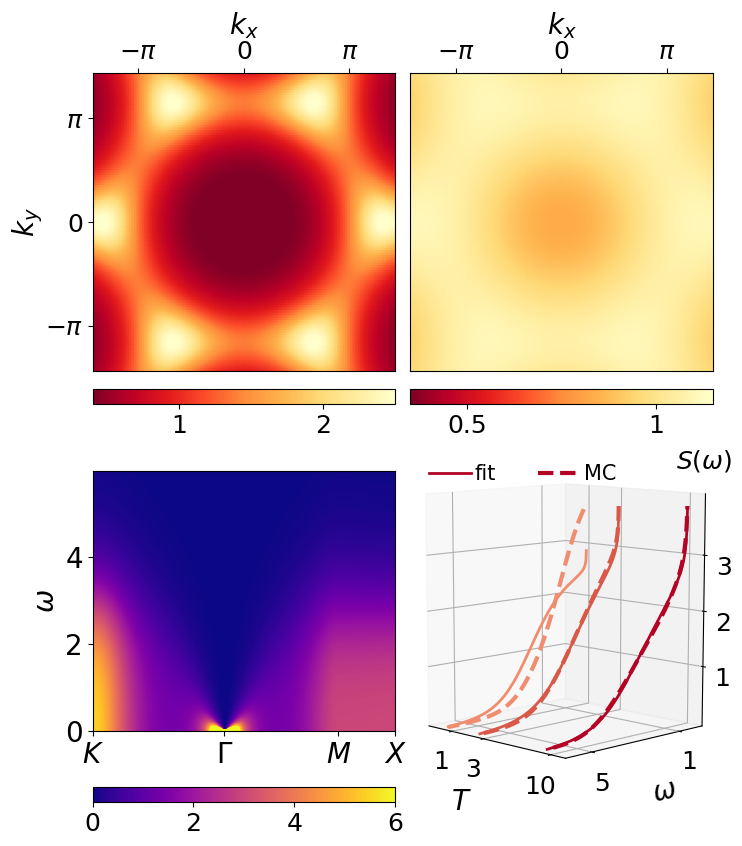

In [25]:
figure = plt.figure(figsize = (8, 10))
gs = figure.add_gridspec(2,2, wspace=.05, hspace=.07)
axis1 = figure.add_subplot(gs[0,0])
axis2 = figure.add_subplot(gs[0,1], sharey=axis1)
plt.setp(axis2.get_yticklabels(), visible=False)
axis3 = figure.add_subplot(gs[1,0])
axis4 = figure.add_subplot(gs[1,1], projection='3d')
#####################################


x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
T=1.0
ind=0
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.4
vmax=2.5
im=axis1.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis1.set_xlim([-4.5,4.5])
axis1.set_ylim([-4.5,4.5])
axis1.set_xlabel(r"$k_x$",size=20)
axis1.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis1.tick_params(axis='x', which='major', labelsize=18)
axis1.tick_params(axis='y', which='major', labelsize=18)
axis1.locator_params(axis='y', nbins=4)
axis1.locator_params(axis='x', nbins=4)
axis1.xaxis.set_label_position("top")
axis1.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis1.set_xticks(xtpos)
axis1.set_xticklabels(xt,size=18)
yt=[r"$-\pi$",0,r"$\pi$"]
ytpos=np.array([-np.pi,0,np.pi])
axis1.set_yticks(xtpos)
axis1.set_yticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis1, location='bottom',orientation="horizontal", pad = 0.05, ticks=[1,2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['1', '2'])  # vertically oriented colorbar

T=10.0
ind=1
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.35
vmax=1.15
im=axis2.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis2.set_xlim([-4.5,4.5])
axis2.set_ylim([-4.5,4.5])
axis2.set_xlabel(r"$k_x$",size=20)
# axis2.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis2.tick_params(axis='x', which='major', labelsize=18)
axis2.tick_params(axis='y', which='major', labelsize=18,left = False)
axis2.locator_params(axis='y', nbins=4)
axis2.locator_params(axis='x', nbins=4)
axis2.xaxis.set_label_position("top")
axis2.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis2.set_xticks(xtpos)
axis2.set_xticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis2, location='bottom',orientation="horizontal", pad = 0.05, ticks=[0.5,1.0])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0.5', '1'])  # vertically oriented colorbar
#####################################
T=1.0
SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis3.imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis3.set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis3.set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis3.set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis3, location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar

######################################
nnn=10
colors = plt.cm.coolwarm(np.linspace(0,1,nnn))

ome=np.linspace(0.001, 2*np.pi-0.01, 1000)
ome2=np.array(ome)
lwval=2
axis4.plot3D(0*ome2+10,ome2,S1_fit, ls='-', c=colors[7], lw=lwval)
axis4.plot3D(0*ome2+7,ome2,S3_fit, ls='-', c=colors[8], lw=lwval)
axis4.plot3D(0*ome2+1,ome2,S10_fit, ls='-', c=colors[9], lw=lwval, label='fit')
lwval=3
axis4.plot(0*ome2+ 10,ome2,S1, ls='--', c=colors[7], lw=lwval)
axis4.plot(0*ome2+7,ome2,S3, ls='--', c=colors[8], lw=lwval)
axis4.plot(0*ome2+1,ome2,S10, ls='--', c=colors[9], lw=lwval, label='MC')

axis4.tick_params(axis='x', which='major', labelsize=18, pad=0)
axis4.tick_params(axis='y', which='major', labelsize=18,left = False, pad=0)
axis4.tick_params(axis='z', which='major', labelsize=18, pad=0)

axis4.set_xlabel(r"$T$",size=20)
axis4.set_ylabel(r"$\omega$",size=20,labelpad=.0001)
# axis4.set_zlabel(r"$S(\omega)$",size=20,labelpad=.0001)


xt=[r"1",r"3",r"10"]
xtpos=np.array([10,7, 1])
axis4.set_xticks(xtpos, pad=0.001)
axis4.set_xticklabels(xt,size=18)
axis4.set_xlim([0,12])
yt=[r"1",r"5"]
ytpos=np.array([1,5])
axis4.set_yticks(ytpos, pad=0.001)
axis4.set_yticklabels(yt,size=18)
axis4.set_ylim([0,6])
zt=[r"1",r"2",r"3"]
ztpos=np.array([1,2,3])
axis4.set_zticks(ztpos, pad=0.001)
axis4.set_zticklabels(zt,size=18)
axis4.set_zlim([0,4])

axis4.legend(ncol=2,prop={'size':15}, loc='upper left',frameon=None, framealpha=0.0, bbox_to_anchor=[0.0, 1.2],handletextpad =   0.2)

from mpl_toolkits.mplot3d import Axes3D
axis4.get_proj = lambda: np.dot(Axes3D.get_proj(axis4), np.diag([1, 1, 1.6, 1]))
axis4.text(2, 0, 4.5, r"$S(\omega)$", fontsize=18)
axis4.view_init(10, 135)
plt.savefig('fig1.png', dpi=500,orientation='portrait', bbox_inches='tight', pad_inches=0.1,facecolor='w',edgecolor='w')

temp of the structure factor 1.0
temp of the structure factor 10.0
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


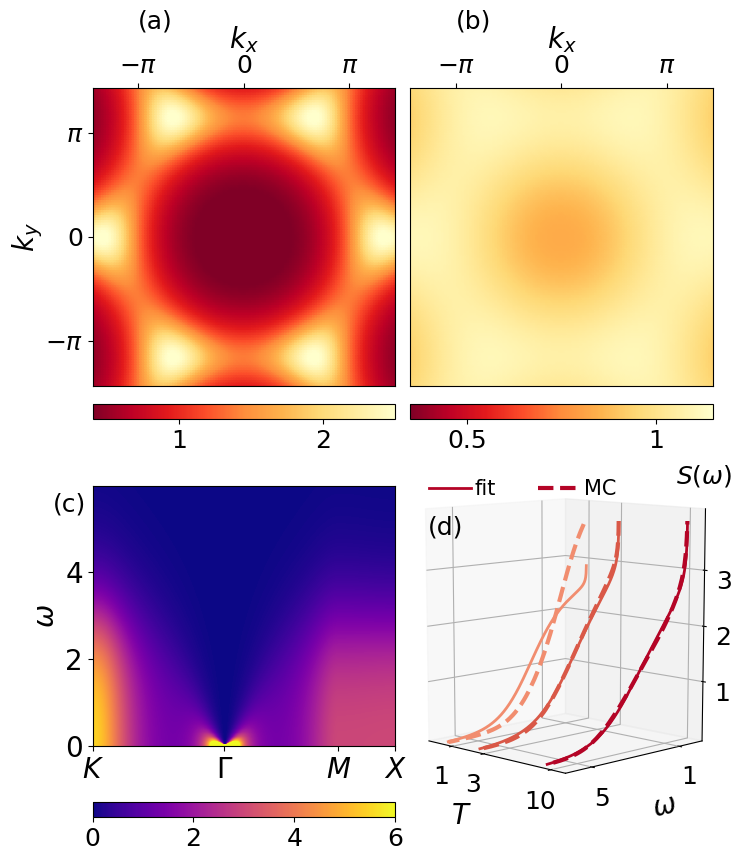

In [54]:
figure = plt.figure(figsize = (8, 10))
gs = figure.add_gridspec(2,2, wspace=.05, hspace=.07)
axis1 = figure.add_subplot(gs[0,0])
axis2 = figure.add_subplot(gs[0,1], sharey=axis1)
plt.setp(axis2.get_yticklabels(), visible=False)
axis3 = figure.add_subplot(gs[1,0])
axis4 = figure.add_subplot(gs[1,1], projection='3d')
#####################################


x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
T=1.0
ind=0
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.4
vmax=2.5
im=axis1.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis1.set_xlim([-4.5,4.5])
axis1.set_ylim([-4.5,4.5])
axis1.set_xlabel(r"$k_x$",size=20)
axis1.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis1.tick_params(axis='x', which='major', labelsize=18)
axis1.tick_params(axis='y', which='major', labelsize=18)
axis1.locator_params(axis='y', nbins=4)
axis1.locator_params(axis='x', nbins=4)
axis1.xaxis.set_label_position("top")
axis1.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis1.set_xticks(xtpos)
axis1.set_xticklabels(xt,size=18)
yt=[r"$-\pi$",0,r"$\pi$"]
ytpos=np.array([-np.pi,0,np.pi])
axis1.set_yticks(xtpos)
axis1.set_yticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis1, location='bottom',orientation="horizontal", pad = 0.05, ticks=[1,2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['1', '2'])  # vertically oriented colorbar
axis1.text(-np.pi, np.pi*2,  "(a)", fontsize=18)

T=10.0
ind=1
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.35
vmax=1.15
im=axis2.scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis2.set_xlim([-4.5,4.5])
axis2.set_ylim([-4.5,4.5])
axis2.set_xlabel(r"$k_x$",size=20)
# axis2.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis2.tick_params(axis='x', which='major', labelsize=18)
axis2.tick_params(axis='y', which='major', labelsize=18,left = False)
axis2.locator_params(axis='y', nbins=4)
axis2.locator_params(axis='x', nbins=4)
axis2.xaxis.set_label_position("top")
axis2.xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis2.set_xticks(xtpos)
axis2.set_xticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis2, location='bottom',orientation="horizontal", pad = 0.05, ticks=[0.5,1.0])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0.5', '1'])  # vertically oriented colorbar
axis2.text(-np.pi, np.pi*2, "(b)", fontsize=18)

#####################################
T=1.0
SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=axis3.imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
axis3.set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
axis3.set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
axis3.set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=axis3, location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar
axis3.text(-0.3*Nt_points, 0.9*Nomegs, "(c)", fontsize=18)

######################################
nnn=10
colors = plt.cm.coolwarm(np.linspace(0,1,nnn))

ome=np.linspace(0.001, 2*np.pi-0.01, 1000)
ome2=np.array(ome)
lwval=2
axis4.plot3D(0*ome2+10,ome2,S1_fit, ls='-', c=colors[7], lw=lwval)
axis4.plot3D(0*ome2+7,ome2,S3_fit, ls='-', c=colors[8], lw=lwval)
axis4.plot3D(0*ome2+1,ome2,S10_fit, ls='-', c=colors[9], lw=lwval, label='fit')
lwval=3
axis4.plot(0*ome2+ 10,ome2,S1, ls='--', c=colors[7], lw=lwval)
axis4.plot(0*ome2+7,ome2,S3, ls='--', c=colors[8], lw=lwval)
axis4.plot(0*ome2+1,ome2,S10, ls='--', c=colors[9], lw=lwval, label='MC')

axis4.tick_params(axis='x', which='major', labelsize=18, pad=0)
axis4.tick_params(axis='y', which='major', labelsize=18,left = False, pad=0)
axis4.tick_params(axis='z', which='major', labelsize=18, pad=0)

axis4.set_xlabel(r"$T$",size=20)
axis4.set_ylabel(r"$\omega$",size=20,labelpad=.0001)
# axis4.set_zlabel(r"$S(\omega)$",size=20,labelpad=.0001)


xt=[r"1",r"3",r"10"]
xtpos=np.array([10,7, 1])
axis4.set_xticks(xtpos, pad=0.001)
axis4.set_xticklabels(xt,size=18)
axis4.set_xlim([0,12])
yt=[r"1",r"5"]
ytpos=np.array([1,5])
axis4.set_yticks(ytpos, pad=0.001)
axis4.set_yticklabels(yt,size=18)
axis4.set_ylim([0,6])
zt=[r"1",r"2",r"3"]
ztpos=np.array([1,2,3])
axis4.set_zticks(ztpos, pad=0.001)
axis4.set_zticklabels(zt,size=18)
axis4.set_zlim([0,4])

axis4.legend(ncol=2,prop={'size':15}, loc='upper left',frameon=None, framealpha=0.0, bbox_to_anchor=[0.0, 1.2],handletextpad =   0.2)

from mpl_toolkits.mplot3d import Axes3D
axis4.get_proj = lambda: np.dot(Axes3D.get_proj(axis4), np.diag([1, 1, 1.6, 1]))
axis4.text(2, 0, 4.5, r"$S(\omega)$", fontsize=18)
axis4.view_init(10, 135)

axis4.text(10, 7, 3.7, "(d)", fontsize=18)

plt.savefig('fig1.eps', dpi=300,orientation='portrait', bbox_inches='tight', pad_inches=0.1,facecolor='w',edgecolor='w')